In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---

# The Problem
Now how many squares? Can we predict how many squares for *this* pattern of any square length $\ell$?

![Hard Mode](https://thumbs.dreamstime.com/b/seamlesly-repeatable-diagonal-oblique-slanting-lines-graph-paper-pattern-slope-skew-grid-mesh-draft-drawing-plotting-texture-159489564.jpg)

---

## Set up data
In this problem, I didn't have the actual mathematical proof for the growth of squares for this pattern. So I don't know what the growth does look like before starting out. What I've done to suppliment this is divide the information regarding the growth of the number of squares into the *solved* simple squares and the *unsolved* diagonal squares.

Fortunately, we start to see a repeating pattern in the diagonal squares growth.

In [2]:
df = pd.DataFrame()

In [3]:
l = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

# Equation 1.1
def l_squared_sum(arg):
    result = []
    try:
        for el in arg:
            result.append(np.sum( np.arange(1,el+1)**2 ))
        return result
    except TypeError:
         return np.sum( np.arange(1,arg+1)**2 )
        
l2_sum = l_squared_sum(l)

In [4]:
n = [1,5,16,35,65,108,168,246,345,467,616,793]

one_by_one = [0,0,2,4,8,12,18,24,32,40,50,60]
two_by_two = [0,0,0,1,2,5,8,13,18,25,32,41]
three_by_three = [0,0,0,0,0,0,2,4,8,12,18,24]
four_by_four = [0,0,0,0,0,0,0,1,2,5,8,13]
five_by_five = [0,0,0,0,0,0,0,0,0,0,2,4]
six_by_six = [0,0,0,0,0,0,0,0,0,0,0,1]

In [5]:
df['l'] = l
df['l2_sum'] = l2_sum
df['1x1'] = one_by_one
df['2x2'] = two_by_two
df['3x3'] = three_by_three
df['4x4'] = four_by_four
df['5x5'] = five_by_five
df['6x6'] = six_by_six
df['n'] = n

In [6]:
df

,l,l2_sum,1x1,2x2,3x3,4x4,5x5,6x6,n
0,1,1,0,0,0,0,0,0,1
1,2,5,0,0,0,0,0,0,5
2,3,14,2,0,0,0,0,0,16
3,4,30,4,1,0,0,0,0,35
4,5,55,8,2,0,0,0,0,65
5,6,91,12,5,0,0,0,0,108
6,7,140,18,8,2,0,0,0,168
7,8,204,24,13,4,1,0,0,246
8,9,285,32,18,8,2,0,0,345
9,10,385,40,25,12,5,0,0,467


Note that the `l2_sum` column is just the result of Equation 1.1 $( \sum^{\ell}_{s=1}s^2 )$ from the simple squares solution of the previous notebook.

---

## Visualization
Rather than try to discover the growth rate for the diagonal squares through brute force, let's first visualize the data to help inspire our intuition.

First we will see how non-linear the relationship is between $\ell$ and $n$, and how it compares to the simple "**straight**" squares solution (Equation 1.1).

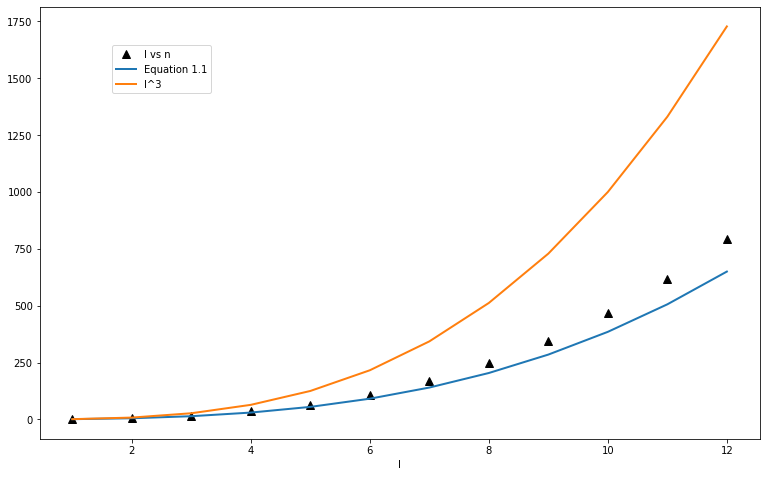

In [7]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.set_xlabel('l')

ax.plot(df['l'], df['n'], '^k', label='l vs n', markersize=8)
ax.plot(df['l'], df['l2_sum'], label='Equation 1.1', lw=2)
ax.plot(df['l'], df['l']**3, label='l^3', lw=2)

ax.legend(loc=(0.1,0.8))
plt.show()

So we see that the values for $n$ fall just above the values for $n$ for the simple squares solution, plus some growing residual.

This residual amount are the growing diagonal squares, so let's turn our attention to those for a moment. We will need to understand how those grow as the grid is expanded, so let's make a graph of the difference between grids of consecutive size $\ell$. 

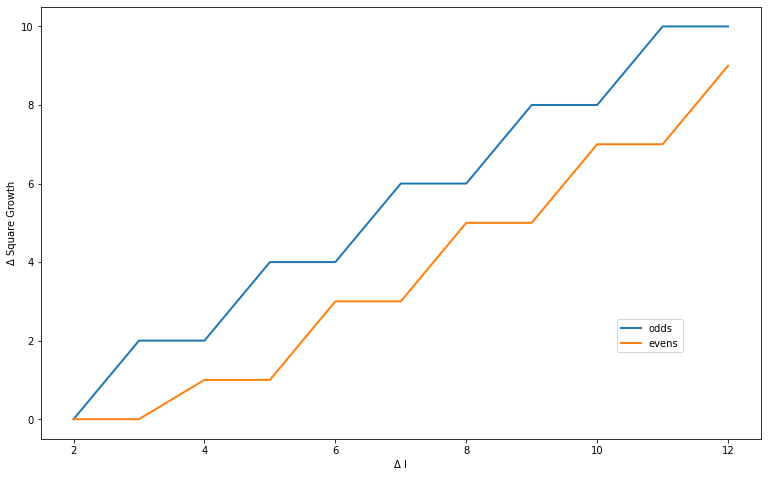

In [8]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.set_xlabel('Δ l')
ax.set_ylabel('Δ Square Growth')

ax.plot(df['l'][1:], df['1x1'][1:].values - df['1x1'][0:-1].values, label='odds', lw=2)
ax.plot(df['l'][1:], df['2x2'][1:].values - df['2x2'][0:-1].values, label='evens', lw=2)

ax.legend(loc=(0.8,0.2))
plt.show()

**So we have just stumbled into the actual growth of these two diagonal squares**.  

They increase at the same rate; they add two to their growth rate every two iterations. The only difference between these two lines is that the even sized squares (such as $2 \times 2, 4 \times 4$, etc.) start later and go up by 1 before growing at a rate of 2 after every other iteration.

Since this is now determined, we may wish to write a function that describes these two behaviors. We will do that in the next section, but first let's do the visualization for the model fits of a couple degrees to see which model we might want to use.

*Remember, our data has no noise, so this should be fine.*

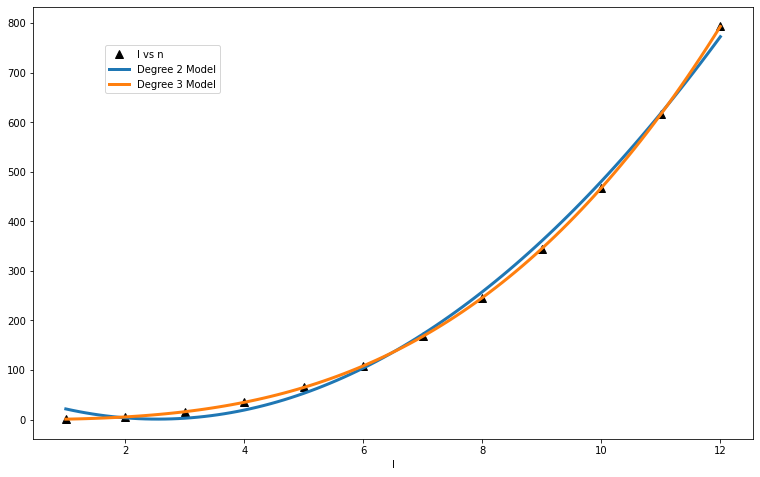

In [9]:
# Quick fit and visualization
xp = np.linspace(1, 12, 100)

z = np.polyfit(df['l'], df['n'], 1)
z2 = np.polyfit(df['l'], df['n'], 2)
z3 = np.polyfit(df['l'], df['n'], 3)

p = np.poly1d(z)
p2 = np.poly1d(z2)
p3 = np.poly1d(z3)

fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.set_xlabel('l')

ax.plot(df['l'], df['n'],'^k', label='l vs n', markersize=8)
ax.plot(xp, p2(xp), label='Degree 2 Model', lw=3)
ax.plot(xp, p3(xp), label='Degree 3 Model', lw=3)

ax.legend(loc=(0.1,0.8))
plt.show()

So we will attempt to fit a single model using some linear combination of $\ell$, $\ell^2$, and $\ell^3$, just as before. Except with different coefficients and intercept.

\begin{equation}
    n \approx \beta_0 + \beta_1 \ell + \beta_2 \ell^2 + \beta_3 \ell^3
    \tag{2.1}
\end{equation}

But before we do that, let's first graph what the diffference is in growth between each iterative step of $\ell$.

---

## Writing the diagonal growth function
We'll need this to compare and evaluate our trained model.

In [10]:
def diag_growth(l, dim=1):
    ''' Enter a side length for the size of the outer grid.
        Enter the dimension of the diagonal squares you are interested in. '''
    
    values = []
    accel_growth = False
    
    if 2*dim > l:
        while l > 0:
            values.append(0)
            l-=1
        return np.array(values)
    
    if dim%2 == 0:
        growth_rate = 1
        dim = dim*2 - 2
    else:
        growth_rate = 2
        dim = dim*2 - 1
        
    while dim >= 0:
        values.append(0)
        dim-=1
    
    try:
        if values[l] == 0:
            return np.array(values)
    except IndexError:
        while len(values) < l:
            if accel_growth: 
                accel_growth = False
                values.append(values[-1] + growth_rate)
                growth_rate+=2
            else:
                values.append(values[-1] + growth_rate)
                accel_growth = True
    
    return np.array(values)

In [11]:
# Values from our data
print("Odd values from data: ", df['1x1'].values)

# Results from our function
print("Odd values from func: ",diag_growth(12, dim=1))

print(70*'=')

# Values from our data
print("Even values from data: ", df['2x2'].values)

# Results from our function
print("Even values from func: ",diag_growth(12, dim=2))

Odd values from data:  [ 0  0  2  4  8 12 18 24 32 40 50 60]
Odd values from func:  [ 0  0  2  4  8 12 18 24 32 40 50 60]
Even values from data:  [ 0  0  0  1  2  5  8 13 18 25 32 41]
Even values from func:  [ 0  0  0  1  2  5  8 13 18 25 32 41]


We can now use this function to generate some test data. But let's first finish up our model from Equation 2.1 and then come back to generating test data.

---

## Find coefficients to fit the models

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()

In [14]:
X = pd.DataFrame()
X['l'] = df['l']
X['l2'] = df['l']**2
X['l3'] = df['l']**3

X.head(3)

,l,l2,l3
0,1,1,1
1,2,4,8
2,3,9,27


In [15]:
lm.fit(X,df['n'])

LinearRegression()

In [16]:
print('Intercept: ', lm.intercept_)

Intercept:  -0.22222222222225696


In [17]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff (𝛽)'])
cdf

,Coeff (𝛽)
l,0.149110
l2,0.487235
l3,0.417379


---

## Generating test data
Our model was trained on only 12 data points, $\ell_{\text{train}}: 1\to12$. So let's take a few points just outside that range, as well as a few points far outside the range to see how the model performs for large $\ell$

In [18]:
l_test = [15,20,25,50,80,100,1000]
l2_test_sum = l_squared_sum(l_test)
l2_test_sum = pd.DataFrame(l2_test_sum, index=l_test, columns=['straights'])
l2_test_sum

,straights
15,1240
20,2870
25,5525
50,42925
80,173880
100,338350
1000,333833500


These are values for the number of squares without counting the diagonal squares.

Let's go ahead and count the diagonals now.

In [19]:
results = {}

for el in l_test:
    results[el] = []
    for i in np.arange(1,el):
        results[el].append(np.sum(diag_growth(el,dim=i)[-1]))
    
    results[el] = np.sum(results[el])

In [20]:
results = pd.DataFrame.from_dict(results, orient='index', columns=['diagonals'])
results

,diagonals
15,280
20,665
25,1300
50,10412
80,42660
100,83325
1000,83333250


Now we simply add the corresponding values.

In [21]:
results['straights'] = l2_test_sum['straights']
results['n'] = results['straights'] + results['diagonals']
results

,diagonals,straights,n
15,280,1240,1520
20,665,2870,3535
25,1300,5525,6825
50,10412,42925,53337
80,42660,173880,216540
100,83325,338350,421675
1000,83333250,333833500,417166750


---

## Make those predictions
Okay, now let's make predictions for the test points we just computed *true values* for using the model we built earlier (Equation 2.1 and 2.2).

Just first remember that our model requires $\ell_{\text{test}}^3$ and $\ell_{\text{test}}^2$ as well as $\ell_{\text{test}}$, so we will have to write over `l_test` from before to include both.

In [22]:
l_test = [[15,15**2,15**3],
          [20,20**2, 20**3],
          [25,25**2,25**3],
          [50,50**2,50**3],
          [80,80**2,80**3],
          [100,100**2,100**3],
          [1000,1000**2,1000**3]]
l_test

[[15, 225, 3375],
 [20, 400, 8000],
 [25, 625, 15625],
 [50, 2500, 125000],
 [80, 6400, 512000],
 [100, 10000, 1000000],
 [1000, 1000000, 1000000000]]

In [23]:
predictions = lm.predict(l_test)

In [24]:
print('Predictions: ', predictions)

Predictions:  [1.52029615e+03 3.53668531e+03 6.82957298e+03 5.33976854e+04
 2.16828016e+05 4.22265956e+05 4.17866301e+08]


---

## Review performance
This gives us a sort of average of the errors, which we will actually break down in the next section.

In [25]:
from sklearn import metrics

In [26]:
metrics.mean_absolute_error(results['n'],predictions)

100071.06660004506

In [27]:
np.sqrt(metrics.mean_squared_error(results['n'],predictions))

264405.6388453675

---

## Final Thoughts
We see that the model doesn't do as well here. For the grid of size $\ell = 15$, the model predicted 1,520 total squares, which is correct! For $\ell = 25$, the model predicted 6,830 which is only five squares over the actual answer. But if we're already seeing some inaccuracy, then how does it perform for large $\ell$?

For $\ell = 1000$ the model predicted 417,866,301 when there are 417,166,750! It overestimated the total squares by almost 700 thousand squares! It's clear that this worsening fit for larger $\ell$ is due to the lack of data for large values of $\ell$. In fact, most people might have expected this to happen, since the only data available was data for which I was willing to count by hand, and for $\ell = 12$ I was already counting almost 150 squares on the diagonal by hand.

Of course, now that we have our function, we could use it to give us a better sample of $l \text{ vs } n$. A better sample of the data, one that wasn't so concentrated around small values of $\ell$, would certainly improve our model. However, I'll leave that as an exercise for the reader; I'm content with a function that can just give us the answer.